# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:

!python --version

Python 3.10.12


In [11]:
!pip install scikit-learn

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'sklearn'

In [71]:
import sklearn
sklearn.__version__

'1.2.2'

## **2. Load the data set**

In [ ]:
#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv('chemokine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Drop rows containing NaN values
df = df.dropna()

# Write the DataFrame back to the original CSV file, overwriting it
df.to_csv('chemokine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)



## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [10]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2184,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2185,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2186,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [11]:
Y = df.pIC50
Y

0       6.474955
1       7.552842
2       8.000000
3       7.455932
4       7.823909
          ...   
2183    4.317945
2184    4.424697
2185    8.102373
2186    8.853872
2187    4.625967
Name: pIC50, Length: 2188, dtype: float64

### **3.3. Let's examine the data dimension**

In [12]:

X.shape


(2188, 881)

In [13]:
Y.shape

(2188,)

### **3.4. Remove low variance features**

In [14]:
"""from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)"""

from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assuming X is your original dataset
# Replace X with your actual dataset

# Get the column names of your original dataset
col_names = X.columns.tolist()

# Instantiate and fit the VarianceThreshold transformer
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

# Get the selected feature indices
selected_indices = selection.get_support(indices=True)

# Get the column names corresponding to the selected features
selected_column_names = [col_names[i] for i in selected_indices]

# Write the selected column names to a text file
output_file = 'selected_column_names.txt'
with open(output_file, 'w') as file:
    for column_name in selected_column_names:
        file.write(column_name + '\n')

print(f"Selected column names saved to {output_file}")







Selected column names saved to selected_column_names.txt


In [15]:
X.shape

(2188, 146)

In [16]:
X

array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1]])

## **4. Data split (80/20 ratio)**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
X_train.shape, Y_train.shape

((1750, 146), (1750,))

In [19]:
X_test.shape, Y_test.shape

((438, 146), (438,))

In [20]:
X_test

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

## **5. Building a Regression Model using Random Forest**

In [21]:
#model = RandomForestRegressor(n_estimators=100)
#model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8324351017975857

In [22]:
Y_pred = model.predict(X_test)
Y_pred

array([9.1552766 , 6.51491563, 8.1800634 , 9.42738701, 7.96079067,
       5.83257791, 7.69542869, 5.83257791, 5.47523591, 8.52247313,
       6.96638787, 7.1214115 , 7.27838976, 8.83567208, 8.5078679 ,
       4.14042337, 7.31227643, 8.89332715, 8.1480706 , 5.85998395,
       5.06147232, 8.92322884, 7.79930233, 8.08323553, 6.99831897,
       6.61874208, 7.30135412, 4.86231514, 8.38763484, 7.30523518,
       7.67757787, 6.38888225, 5.53688807, 6.71908997, 6.8199258 ,
       8.49878045, 5.56084857, 7.6003421 , 6.44903302, 8.46783247,
       8.30700102, 9.14637646, 9.52711527, 5.60124408, 6.62886791,
       6.45851499, 8.20311294, 6.58540876, 7.87041991, 7.08972806,
       5.1557915 , 8.27580075, 7.59235223, 8.44092419, 7.84656362,
       8.15985593, 6.80320343, 7.2831409 , 8.39152821, 9.29948084,
       7.27841988, 8.05800851, 5.36476454, 7.23870706, 8.42786007,
       7.88748773, 7.45932111, 8.57109379, 5.4463708 , 7.50591264,
       8.57109379, 6.72384302, 6.03286697, 5.90292837, 6.58310

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

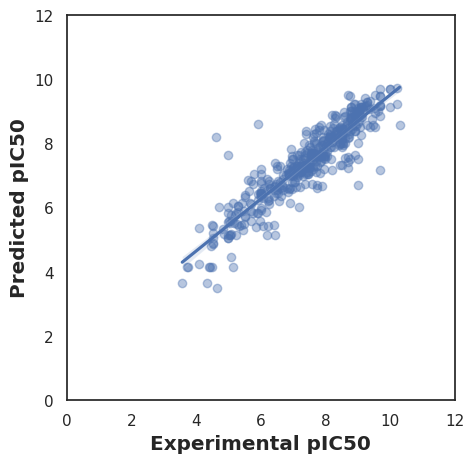

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [30]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-04-03 04:36:24--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-04-03 04:36:24--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   104MB/s    in 0.2s    

2024-04-03 04:36:25 (104 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-04-03 04:36:25--  https://github

In [31]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [24]:
import pandas as pd
df3 = pd.read_csv('input.csv')
df3

,molecule_chembl_id,canonical_smiles
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...
5,CHEMBL105572,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...


In [25]:

selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [26]:
! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2nnnc2-c2ccccc2)c2ccccc2)CC1	CHEMBL105460
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2cncn2)c2ccccc2)CC1	CHEMBL105606
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c1cccc(Cl)c1)S(=O)(=O)c1ccccc1	CHEMBL83338
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2ncc3ccccc32)c2ccccc2)CC1	CHEMBL325357


In [32]:
! cat molecule.smi | wc -l

6


In [33]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [68]:
! bash padel.sh

Processing CHEMBL105606 in molecule.smi (2/6). 
Processing CHEMBL105460 in molecule.smi (1/6). 
Processing CHEMBL105570 in molecule.smi (3/6). Average speed: 2.65 s/mol.
Processing CHEMBL83338 in molecule.smi (4/6). Average speed: 1.47 s/mol.
Processing CHEMBL325357 in molecule.smi (5/6). Average speed: 1.77 s/mol.
Processing CHEMBL105572 in molecule.smi (6/6). Average speed: 1.41 s/mol.
Descriptor calculation completed in 7.542 secs . Average speed: 1.26 s/mol.


In [35]:
df3_X = pd.read_csv('descriptors_output.csv')

In [36]:

df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL105606,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL105460,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL105570,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL83338,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL325357,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL105572,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x1 = df3_X.drop('Name', axis=1)
x1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import joblib

# Load the trained model from the .pkl file
model = joblib.load('model.pkl')


In [6]:
model = joblib.load('model.pkl')

In [39]:
import pandas as pd

# Read the selected column names from the text file
selected_column_names_txt = 'selected_column_names.txt'
with open(selected_column_names_txt, 'r') as file:
    selected_column_names = [line.strip() for line in file]

# Assuming df is your original DataFrame
# Replace df with your actual DataFrame

# Read the original DataFrame
df = pd.read_csv('descriptors_output.csv')

# Filter the DataFrame to keep only the selected columns
df_selected = df[selected_column_names]

# Print the filtered DataFrame
print(df_selected)


   PubchemFP13  PubchemFP16  PubchemFP20  PubchemFP23  PubchemFP33  \
0            0            1            1            0            0   
1            1            1            1            0            0   
2            1            1            1            0            0   
3            0            0            0            0            1   
4            1            1            1            0            0   
5            0            1            1            0            0   

   PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  PubchemFP152  ...  \
0             1             1             1             0             0  ...   
1             1             1             1             0             0  ...   
2             1             1             1             0             0  ...   
3             1             0             1             0             0  ...   
4             1             1             1             0             0  ...   
5             1             1

In [55]:
x1= df_selected

In [56]:
Y_pred = model.predict(x1)
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([7.10364194, 7.6835365 , 7.4116156 , 7.056155  , 7.84076215,
       7.74049506])

In [57]:
Y_pred = pd.DataFrame(Y_pred, columns=["Prediction"])

In [65]:
#Output= df3_X.append(Y_pred)
Output= pd.concat([df3_X, Y_pred],axis=1 )

In [61]:
print(type(df_selected))
print(type(Y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [62]:
print(df3_X.shape[1])
print(Y_pred.shape[1])

882
1


In [66]:
Output

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Prediction
0,CHEMBL105606,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.103642
1,CHEMBL105460,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.683536
2,CHEMBL105570,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.411616
3,CHEMBL83338,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.056155
4,CHEMBL325357,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.840762
5,CHEMBL105572,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.740495
